<a href="https://colab.research.google.com/github/solcanalla/fiumark/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo: KNN #


##Inicialización##

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [8]:
!git clone https://github.com/solcanalla/fiumark.git
%cd fiumark
!git pull origin main
import preprocessing as pp

Cloning into 'fiumark'...
remote: Enumerating objects: 272, done.
remote: Total 272 (delta 0), reused 0 (delta 0), pack-reused 272
Receiving objects: 100% (272/272), 1.19 MiB | 13.39 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/fiumark/fiumark
From https://github.com/solcanalla/fiumark
 * branch            main       -> FETCH_HEAD
Already up to date.


##Modelo 1##

###Pre procesamiento###

Para KNN es importante escalar los datos. 

In [9]:
pd.options.display.max_columns = None

df = pp.get_dataset()
df1 = pp.knn_preprocessing(df)
X_train1, X_test1, y_train1, y_test1 = pp.get_train_test_data(df1)


###Entrenamiento###

In [10]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': np.arange(2, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['cosine','minkowski'],
    'algorithm':['ball_tree','kd_tree','brute']
}

clf = KNeighborsClassifier()

gscv1 = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train1, y_train1)

In [11]:
print(f"Best score: {gscv1.best_score_}")
print(f"Best params {gscv1.best_params_}")

Best score: 0.8386488404697323
Best params {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 16, 'weights': 'distance'}


##Modelo 2##

###Pre procesamiento###

Para KNN es importante escalar los datos. 

In [12]:
pd.options.display.max_columns = None

df = pp.get_dataset()
df2 = pp.scaler_min_features_preprocessing(df)
X_train2, X_test2, y_train2, y_test2 = pp.get_train_test_data(df2)


###Entrenamiento###

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': np.arange(2, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['cosine','minkowski'],
    'algorithm':['ball_tree','kd_tree','brute']
}

clf = KNeighborsClassifier()

gscv2 = GridSearchCV(
    clf, params, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train2, y_train2)

In [14]:
print(f"Best score: {gscv2.best_score_}")
print(f"Best params {gscv2.best_params_}")

Best score: 0.8372580230668216
Best params {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 13, 'weights': 'distance'}


##Evaluación del modelo##

In [15]:
y_pred = gscv1.predict(X_test1)

###Precision recall y F1-score###

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86        95
         1.0       0.85      0.68      0.76        66

    accuracy                           0.82       161
   macro avg       0.83      0.80      0.81       161
weighted avg       0.82      0.82      0.82       161



###Accuracy###

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred)
accuracy

0.8198757763975155

###Auc-Roc###

In [18]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test1, y_pred)
auc_roc

0.7988038277511961

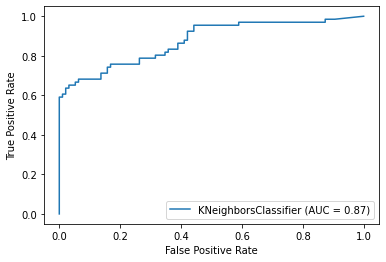

In [21]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv1.best_estimator_, X_test1, y_test1)  
plt.show() 

###Matriz de confusión###

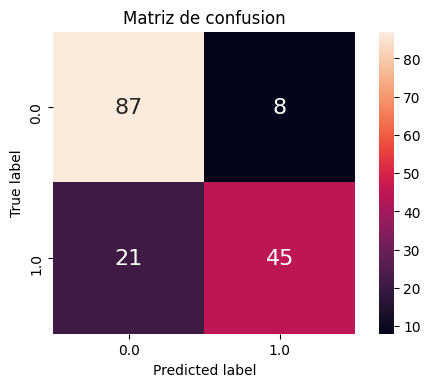

In [22]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    names = sorted(set(y_true))
    cm = confusion_matrix(y_true, y_pred, names)
    df_cm = pd.DataFrame(cm, names, names)

    plt.figure(dpi=100)
    plt.title("Matriz de confusion")
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', square=True)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()


plot_confusion_matrix(y_test1, y_pred)

##Predicción##

In [23]:
X_holdout = pd.read_csv('https://drive.google.com/uc?export=download&id=1I980-_K9iOucJO26SG5_M8RELOQ5VB6A')
X = pp.knn_preprocessing(X_holdout)
prediction = pd.DataFrame(gscv1.predict(X),columns=['volveria'],dtype=int)
pred_formatted = pd.concat([X_holdout.id_usuario,prediction],axis=1)
pred_formatted.to_csv('knn.csv')
pred_formatted

,id_usuario,volveria
0,650,0
1,234,0
2,31,0
3,552,0
4,411,0
...,...,...
85,354,0
86,82,0
87,172,0
88,8,0
